In [1]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1 - Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/tehmeerali786/360-Data-Science-/master/1.01.%20Simple%20linear%20regression.csv", sep=",")

df


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [2]:
df.values

array([[1714.  ,    2.4 ],
       [1664.  ,    2.52],
       [1760.  ,    2.54],
       [1685.  ,    2.74],
       [1693.  ,    2.83],
       [1670.  ,    2.91],
       [1764.  ,    3.  ],
       [1764.  ,    3.  ],
       [1792.  ,    3.01],
       [1850.  ,    3.01],
       [1735.  ,    3.02],
       [1775.  ,    3.07],
       [1735.  ,    3.08],
       [1712.  ,    3.08],
       [1773.  ,    3.12],
       [1872.  ,    3.17],
       [1755.  ,    3.17],
       [1674.  ,    3.17],
       [1842.  ,    3.17],
       [1786.  ,    3.19],
       [1761.  ,    3.19],
       [1722.  ,    3.19],
       [1663.  ,    3.2 ],
       [1687.  ,    3.21],
       [1974.  ,    3.24],
       [1826.  ,    3.28],
       [1787.  ,    3.28],
       [1821.  ,    3.28],
       [2020.  ,    3.28],
       [1794.  ,    3.28],
       [1769.  ,    3.28],
       [1934.  ,    3.28],
       [1775.  ,    3.29],
       [1855.  ,    3.29],
       [1880.  ,    3.29],
       [1849.  ,    3.31],
       [1808.  ,    3.32],
 

In [3]:
print(df.columns)

Index(['SAT', 'GPA'], dtype='object')


In [4]:
TOTAL_SIZE = len(df)
TRAIN_SIZE = int(TOTAL_SIZE * 0.6)
VAL_SIZE = int(TOTAL_SIZE * 0.2)
TEST_SIZE = int(TOTAL_SIZE * 0.2)

#print(TOTAL_SIZE)
#print(TRAIN_SIZE)
#print(VAL_SIZE)
#print(TEST_SIZE)

# Step 2 - Split dataset into training, validation, and test splits
X_todo, X_test, y_todo, y_test = train_test_split(df[["SAT"]].values, df["GPA"].values, test_size=TEST_SIZE, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_todo, y_todo, test_size=VAL_SIZE, random_state=0)

In [5]:
# To make sure that everything is correct and also to get an overview of the
# dimensions of the data, we print out the shapes of each variable.
print("X_train:", len(X_train), "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_val:", y_test.shape)


X_train: 52 y_train: (52,)
X_val: (16, 1) y_val: (16,)
X_test: (16, 1) y_val: (16,)


In [6]:
X_train.min()

1634

In [7]:
X_train.max()

2050

In [8]:
y_train.min()

2.4

In [9]:
y_train.max()

3.81

In [10]:
X_train[0]

array([2050])

In [11]:
y_train[0]

3.81

In [12]:
# Step 3 - Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [13]:
# Notice that after the transformation the type of the inputs will change from integer to float.
X_train.dtype

dtype('float64')

In [14]:
X_train.mean()

-4.82520006856318e-16

In [15]:
X_train.min()

-2.0776669879005647

In [16]:
X_train.max()

1.842445727517229

In [17]:
y_train.min()

2.4

In [18]:
y_train.max()

3.81

In [19]:
import tensorflow.keras as keras

# We set the random seed to 0
keras.utils.set_random_seed(0)


In [20]:
# We can see that after the transformation, each row has been transformed.
# Notice how the first element, which was previously 5, is now all zeroes
# except for the 6th column. The same logic is true for the other rows as
# well.
y_train[0:5]

array([3.81, 3.71, 2.4 , 3.41, 3.4 ])

# Building the network

Now, we can finally start building our neural network. For this, we will use the Sequential class of the keras library, which makes building neural networks really easy.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# The neural network will have 3 hidden layers in total, each with 32-32-32
# neurons.
model = Sequential([
    Dense(units=32, activation="relu", input_shape=(1,)),
    Dropout(0.5),
    Dense(units = 32, activation="relu"),
    Dropout(0.5),
    Dense(units = 32, activation="relu"),
    Dense(units = 1)
])

# Lastly, we also need to compile the model, which is the same as saying
# that we specify the loss and metric used during training.
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.003), loss="MSE")

In [22]:
# We can now print the summary of the model, which tells us how many
# layers there are in the model and how many neurons each one has.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2209 (8.63 KB)
Trainable params: 2209 (8.6

In [23]:
# We can now train the model using the .fit() function.
history = model.fit(
    X_train, y_train, epochs=10, verbose=1, validation_data=(X_val, y_val), batch_size=32
)

Epoch 1/10
2/2 [==============================] - 0s 65ms/step - loss: 12.1367 - val_loss: 10.5130
Epoch 2/10
2/2 [==============================] - 0s 12ms/step - loss: 11.2195 - val_loss: 9.9255
Epoch 3/10
2/2 [==============================] - 0s 12ms/step - loss: 10.5025 - val_loss: 9.3777
Epoch 4/10
2/2 [==============================] - 0s 12ms/step - loss: 9.9581 - val_loss: 8.8308
Epoch 5/10
2/2 [==============================] - 0s 12ms/step - loss: 9.1740 - val_loss: 8.2565
Epoch 6/10
2/2 [==============================] - 0s 11ms/step - loss: 8.2040 - val_loss: 7.6088
Epoch 7/10
2/2 [==============================] - 0s 12ms/step - loss: 7.6020 - val_loss: 6.9065
Epoch 8/10
2/2 [==============================] - 0s 11ms/step - loss: 6.7373 - val_loss: 6.1257
Epoch 9/10
2/2 [==============================] - 0s 12ms/step - loss: 5.8067 - val_loss: 5.2748
Epoch 10/10
2/2 [==============================] - 0s 12ms/step - loss: 5.1502 - val_loss: 4.3985


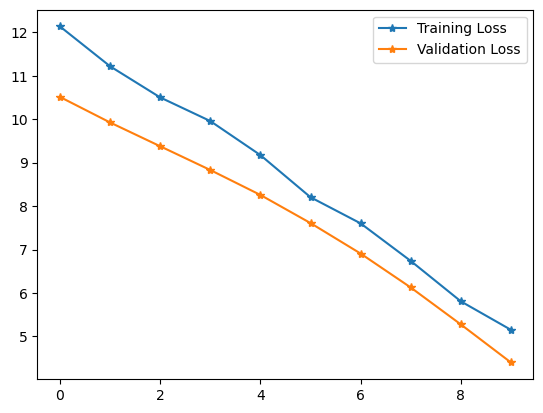

In [24]:
# After the training is done, it is time to check the training and validation
# losses. Both seem to have decreased over the epochs, which is a good sign.
plt.plot(history.history["loss"], "*-")
plt.plot(history.history["val_loss"], "*-")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()